In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd



In [ ]:


file = 'names.txt'
df = pd.read_csv(file, delimiter='\t')
df.head(10)

,emma
0,olivia
1,ava
2,isabella
3,sophia
4,charlotte
5,mia
6,amelia
7,harper
8,evelyn
9,abigail


In [ ]:
words = open('names.txt','r').read().splitlines()
words[0:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [ ]:
len(words)

32033

In [ ]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)


{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [280]:
#build the dataset

block_size = 3 #CONTEXT LENGTH : HOW MANY CHARACTERS DO WE TAKE TO PREDICT THE NEXT ONE

def build_dataset(words):
  X,Y = [], []

  for w in words:
      # print(w)
      context =  [0] * block_size
      for ch in w + '.':
          ix = stoi[ch]
          X.append(context)
          Y.append(ix)

          # print("".join(itos[i] for i in context),'======',itos[ix])

          context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape,Y.shape)
  return X,Y


# print(X.shape,Y.shape)
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])





torch.Size([182512, 3]) torch.Size([182512])
torch.Size([22860, 3]) torch.Size([22860])
torch.Size([22774, 3]) torch.Size([22774])


In [281]:
len(words)



32033

In [282]:
n1,n2


(25626, 28829)

In [283]:
n2 - n1

3203

In [284]:
len(words) - n2

3204

In [285]:
C = torch.randn(27, 2)

In [286]:
C[5]

tensor([ 0.0200, -0.2207])

In [287]:
F.one_hot(torch.tensor(5), num_classes = 27).float() @ C

tensor([ 0.0200, -0.2207])

In [288]:
C[torch.tensor([5,6,7])]

tensor([[ 0.0200, -0.2207],
        [-0.8607,  1.1318],
        [ 0.8091,  0.3965]])

In [292]:
C[Xtr].shape

torch.Size([182512, 3, 2])

In [294]:
emb = C[Xtr]
emb.shape

torch.Size([182512, 3, 2])

In [325]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

# emb @ W1 + b1

In [326]:
h = emb.view(emb.shape[0],-1) @ W1 + b1

In [327]:
h.shape

torch.Size([182512, 100])

In [328]:
h

tensor([[ 1.6131,  0.1957,  0.1760,  ..., -1.1482,  2.3149,  0.1057],
        [ 1.6692,  2.5955, -0.5630,  ..., -2.1384,  0.9647, -1.3293],
        [ 1.8638,  1.4784, -1.3821,  ..., -0.7361,  0.6084, -0.7864],
        ...,
        [ 1.7988, -0.3147, -2.8625,  ..., -1.8565,  4.2404,  1.6987],
        [ 1.1183,  2.1932,  1.3855,  ..., -1.0035, -0.1151, -0.5048],
        [ 1.2459,  1.5006,  0.3515,  ..., -0.6630,  1.5091, -0.7540]])

In [329]:
torch.cat([emb[:,0, :], emb [:,1, :], emb[:,2, :]], 1).shape


torch.Size([182512, 6])

In [330]:
torch.cat([emb[:,0, :], emb [:,1, :], emb[:,2, :]], 1).shape

torch.Size([182512, 6])

In [331]:
h.shape

torch.Size([182512, 100])

In [332]:
h = torch.tanh(emb.view (-1, 6) @ W1 +b1)

In [333]:
h

tensor([[ 0.9236,  0.1932,  0.1742,  ..., -0.8171,  0.9807,  0.1053],
        [ 0.9314,  0.9889, -0.5102,  ..., -0.9726,  0.7464, -0.8691],
        [ 0.9530,  0.9012, -0.8814,  ..., -0.6268,  0.5430, -0.6564],
        ...,
        [ 0.9467, -0.3047, -0.9935,  ..., -0.9524,  0.9996,  0.9352],
        [ 0.8070,  0.9754,  0.8822,  ..., -0.7630, -0.1146, -0.4659],
        [ 0.8471,  0.9053,  0.3377,  ..., -0.5803,  0.9068, -0.6375]])

In [334]:
W2 = torch.randn((100),27)
b2 = torch.randn(27)

In [335]:
logits = h @ W2 + b2

In [336]:
logits.shape

torch.Size([182512, 27])

In [337]:
counts = logits.exp()
len(counts)

182512

In [338]:
prob = counts / counts.sum(1, keepdim=True)

In [339]:
prob[0].sum()

tensor(1.0000)

In [340]:
# prob[torch.arange(32),Y]

In [430]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

In [347]:
Xtr.shape, Ytr.shape

(torch.Size([182512, 3]), torch.Size([182512]))

In [402]:
g= torch.Generator().manual_seed(2147483647)
C = torch.randn(27, 10, generator=g)
W1 = torch.randn((30,200), generator =g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200,27), generator = g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1 , W2, b2]
# parameters

In [403]:
sum(p.nelement() for  p in parameters)

11897

In [404]:
for p in parameters:
    p.requires_grad = True

In [405]:
h.shape

torch.Size([22860, 300])

In [406]:

lre = torch.linspace(-3,0,1000)
lrs = 10**lre


In [407]:
lri = []
lossi = []
stepi = []

In [425]:


for i in range(200000):

    ix = torch.randint(0, Xtr.shape[0], (32,)) #minibatch construct



    emb = C[Xtr[ix]]  #forward pass

    h = torch.tanh(emb.view(-1,30) @ W1 + b1) #32,100
    logits = h @ W2 + b2 # 32,27
    loss = F.cross_entropy(logits, Ytr[ix])


    for p in parameters: #backward pass
        p.grad = None
    loss.backward()


    # lr = lrs [i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters: #update
        p.data += - lr * p.grad


    stepi.append(i)


    # lri.append(lr)
    lossi.append(loss.log10().item())

# print(loss.item())

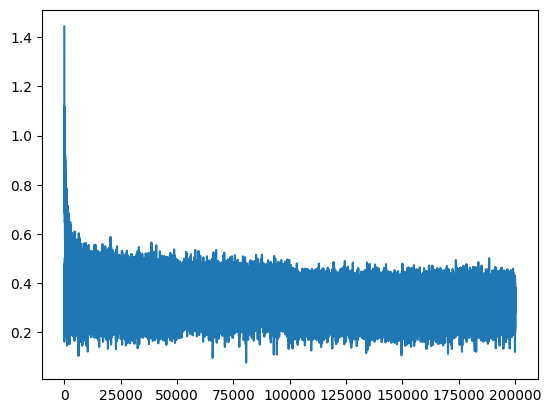

In [426]:
plt.plot(stepi, lossi)

In [427]:
print(loss.item())

2.419304132461548


In [428]:
emb = C[Xtr] #32,3,2
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0922, grad_fn=<NllLossBackward0>)

In [429]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1388, grad_fn=<NllLossBackward0>)

In [ ]:
#  torch.randint(0,5,(32,))

tensor([0, 2, 0, 1, 0, 3, 1, 3, 4, 2, 4, 1, 0, 4, 1, 1, 0, 4, 0, 4, 3, 4, 1, 1,
        3, 4, 4, 3, 0, 4, 0, 0])

In [ ]:
# emb = C[X]
# h = torch.tanh(emb.view(-1,20) @ W1 + b1)
# logits = h @ W2 + b2
# loss = F.cross_entropy(logits, Y)
# loss

tensor(2.2987, grad_fn=<NllLossBackward0>)

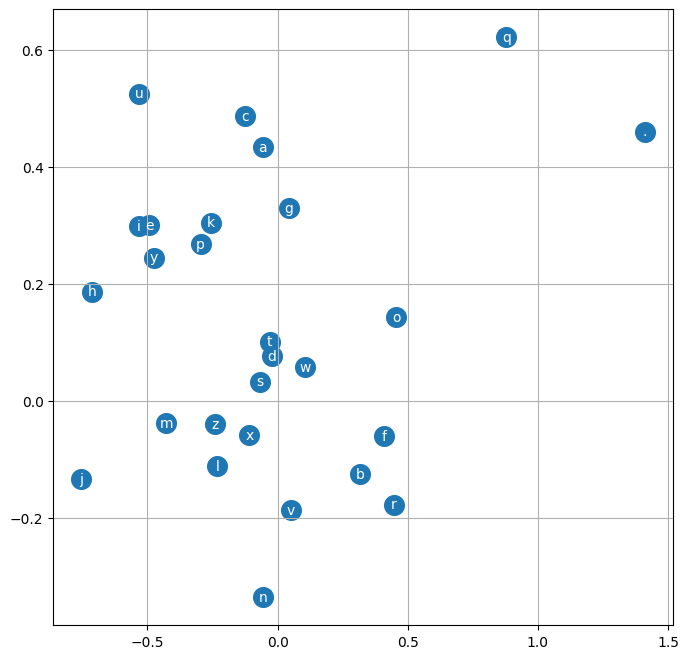

In [419]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [434]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(50):
  out = []
  context = [0] * block_size

  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1,-1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break



  print(''.join(itos[i] for i in out))  #name like


moha.
kayah.
see.
med.
rylle.
emmadiendraege.
dered.
elin.
shi.
jenne.
elisson.
arleiyah.
hoter.
noshubergshimiel.
kendrenlynn.
nophir.
uberted.
ryyah.
fael.
yuma.
mys.
kyla.
hal.
salynn.
uf.
zakel.
juren.
crevis.
jaiel.
pord.
jaquine.
ban.
prick.
kentyn.
kharlo.
jia.
kiri.
evon.
walla.
ortarah.
tani.
sira.
alington.
braivia.
mellake.
armon.
xavia.
damaizekic.
keightud.
rive.
